Learning to use pytorch. Based on the tutorial from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Uncomment this to use GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

# Uncomment this to use CPU
# device = 'cpu'

cuda:0


In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:02<00:00, 66761044.42it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


torch.Size([100, 3, 32, 32])


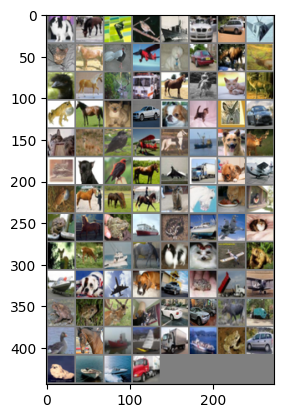

dog   horse plane bird  ship  car   car   plane cat   horse bird  plane dog   car   deer  deer  bird  horse deer  truck horse horse cat   deer  frog  horse cat   car   dog   cat   deer  car   cat   deer  bird  plane horse ship  dog   deer  cat   dog   bird  horse plane truck dog   plane frog  horse horse horse cat   horse cat   bird  frog  horse frog  ship  frog  ship  plane cat   deer  deer  ship  horse dog   dog   plane frog  ship  dog   plane dog   car   frog  truck plane frog  frog  deer  cat   car   car   deer  truck bird  horse ship  ship  truck ship  frog  car   dog   ship  ship  truck


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5) # output size of Bx6x28x28
        self.pool = nn.MaxPool2d(2, 2) # output size of Bx6x0.5x0.5
        self.conv2 = nn.Conv2d(6, 16, 5) # Bx16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

In [ ]:
# Alternate network from the tutorial at https://shonit2096.medium.com/cnn-on-cifar10-data-set-using-pytorch-34be87e09844

class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        # convolutional layer
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 64)
        self.fc3 = nn.Linear(64, 10)
        # dropout
        self.dropout = nn.Dropout(p=.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flattening
        x = x.view(-1, 64 * 4 * 4)
        # fully connected layers
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

net = BetterNet()
net = net.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adamax(net.parameters(), lr=0.005)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


[1,   100] loss: 2.137
[1,   200] loss: 1.845
[1,   300] loss: 1.715
[1,   400] loss: 1.646
[1,   500] loss: 1.560
[2,   100] loss: 1.483
[2,   200] loss: 1.447
[2,   300] loss: 1.401
[2,   400] loss: 1.375
[2,   500] loss: 1.322
[3,   100] loss: 1.271
[3,   200] loss: 1.268
[3,   300] loss: 1.241
[3,   400] loss: 1.215
[3,   500] loss: 1.208
[4,   100] loss: 1.148
[4,   200] loss: 1.132
[4,   300] loss: 1.160
[4,   400] loss: 1.117


KeyboardInterrupt: 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

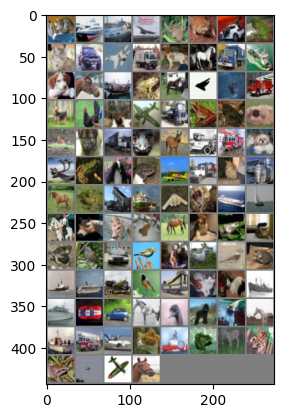

GroundTruth:  cat   ship  ship  plane
Predicted:  cat   car   ship  ship 


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images and the ground truth
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


# Load the network from disk and run it on a single batch of the test images.
# net = Net()
# net.load_state_dict(torch.load(PATH))
outputs = net(images.to(device))

# Output the predicted labels
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
# Get the statistical prediction results for the whole test set
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images.to(device))
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted.to('cpu') == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
# Get the statistical prediction results for each category individually for the whole test set
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions.to('cpu')):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')



Accuracy for class: plane is 59.5 %
Accuracy for class: car   is 71.4 %
Accuracy for class: bird  is 27.2 %
Accuracy for class: cat   is 39.8 %
Accuracy for class: deer  is 56.5 %
Accuracy for class: dog   is 42.9 %
Accuracy for class: frog  is 86.0 %
Accuracy for class: horse is 62.9 %
Accuracy for class: ship  is 82.4 %
Accuracy for class: truck is 73.5 %


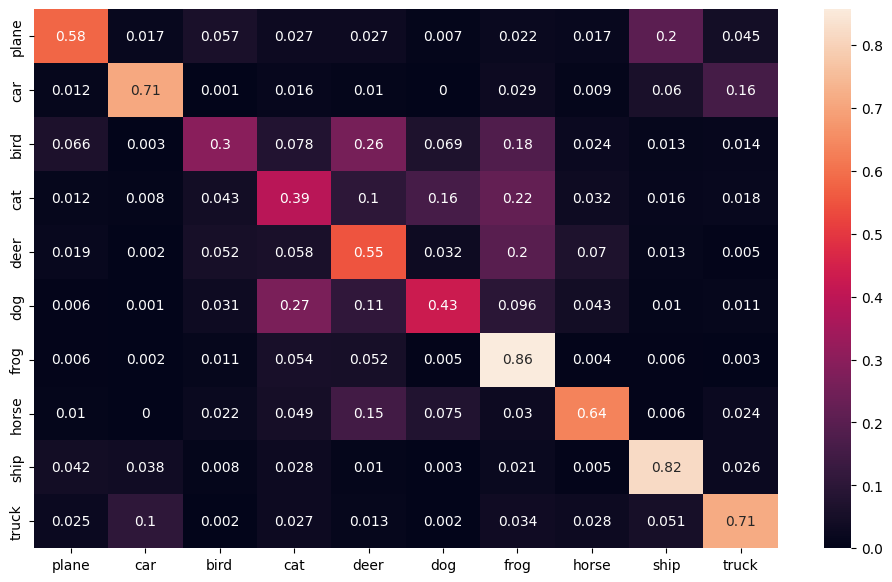

In [ ]:
# build a confusion matrix (based on tutorial from https://christianbernecker.medium.com/how-to-create-a-confusion-matrix-in-pytorch-38d06a7f04b7)
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in testloader:

        outputs = net(images.to(device))
        _, predictions = torch.max(outputs, 1)
        y_pred.extend(predictions.to('cpu'))

        y_true.extend(labels)

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')